# K-means Clustering and Principal Component Analysis

## 3 Optional exercise: PCA for visualization
Actually section 2.5 in ex7.pdf, but I'm doing it as a separate exercise for convenience.

In [1]:
import scipy.io
import numpy as np
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.misc import imread

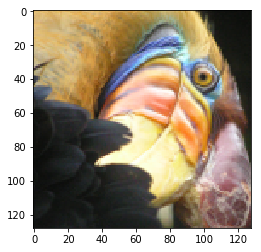

In [2]:
img = imread('data/bird_small.png')
plt.imshow(img)
plt.show()

In [3]:
A = img
A = A / 255 # divide by 255 so all colour values are in range 0-1.

In [4]:
# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the red, green and blue pixel values
# This gives us our dataset matrix X that we will use k-means on.

X = np.reshape(A, [A.shape[0] * A.shape[1], 3])
X.shape

(16384, 3)

In [5]:
def k_means_init_centroids(X, K):
    
    '''
    Returns K random initial centroids to be
    used with the k-means clustering  on the dataset X.
    '''
    
    centroids = np.zeros([K, X.shape[1]])
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]
    
    return centroids

In [6]:
def find_closest_centroids(X, centroids):
    '''
    Returns the closest centroids for every example in dataset X,
    where each row in X is a single example.
    Returned array idx  is an (m x 1) vector of centroid assignments
    (i.e. each entry in range [1..K]).
    '''
    
    idx = np.zeros([X.shape[0], 1])
    
    K = centroids.shape[0] # number of centroids
    m = X.shape[0] # number of examples
    
    for i in range(m):
        c = -1 # index of closest centroid
        dist_min = np.inf # distance to nearest centroid

        for k in range(K):
            dist = distance.euclidean(centroids[k], X[i]) 
            if dist < dist_min:
                dist_min = dist
                c = k
        
        idx[i] = c
    
    return idx

In [7]:
def compute_centroids(X, idx, K):
    '''
    Returns new centroids by computing the means of the data points assigned to each centroid.
    Parameters:
    -dataset X where each row is a single data point
    -a vector idx of centroid assignments for each example in X
    -the number of centroids K.
    '''

    m, n = X.shape # nuber and dimension of examples
    centroids = np.zeros([K, n])
   
    for k in range(K):
        C = np.sum(idx==k) # number of examples assigned to centroid k
        idx_k = (idx==k).astype(int) # binary array of examples assigned to centroid k
        X_k = X * idx_k # array of coordinates of examples assigned to centroid k

        # Calculate new centroid mean
        mu = (1/C) * np.sum(X_k, axis=0)
        centroids[k] = mu

    return centroids

In [8]:
def run_k_means(X, initial_centroids, max_iters, plot_progress=False):
    '''
    Runs the k-means algorithm on data matrix X, with initial
    centroids initial_centroids, and maxmimum number of iterations
    max_iters. plot_progress is a true/false flag that 
    indicates if the function should plot its progress.
    
    Returns centroids, a (K x n) matrix of the computed centroids,
    and idx, a (m x 1) vector of centroid assignments.
    '''
    
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros([m, 1])

    centroids_history = np.zeros([max_iters+1, centroids.shape[0], centroids.shape[1]])
    centroids_history[0] = initial_centroids
    
    if plot_progress:
        print('Before clustering:')
        plot_k_means(X, idx, centroids_history)
    
    # Run k-means
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
        centroids_history[i+1] = centroids

    if plot_progress:
        print('Clustering after', max_iters, 'iterations of k-means:')
        plot_k_means(X, idx, centroids_history, terminated=True)
        
    return centroids, idx

In [9]:
# Run k-means
K = 16
max_iters = 10

initial_centroids = k_means_init_centroids(X, K)
centroids, idx = run_k_means(X, initial_centroids, max_iters)

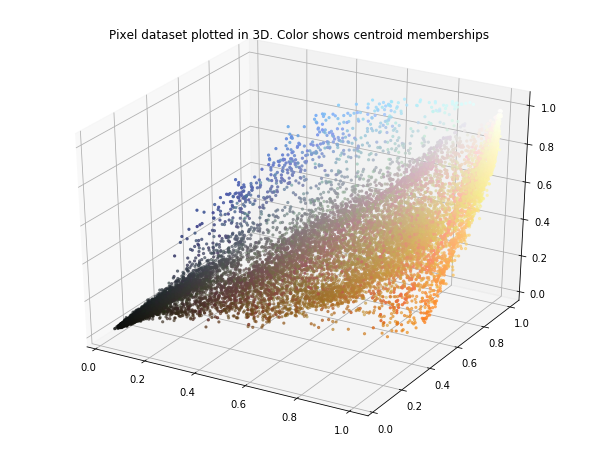

In [27]:
# Visualize data and centroid memberships in 3D
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='.', c=idx, cmap='rainbow')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='.', c=X)
ax.set_title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show()

In [11]:
# Use PCA to project and visualise in 2D

In [12]:
def feature_normalise(X):
    '''
    Returns a normalized version of X where the mean value
    of each feature (column) is 0 and the standard deviation is 1.
    '''
    
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm / sigma
    
    return X_norm, mu, sigma

In [13]:
X_norm, mu, sigma = feature_normalise(X)

In [14]:
def pca(X):
    '''
    Computes eigenvectors of the covariance matrix of X.
    Returns the eigenvectors U, and eigenvalues S.
    '''
    
    m, n = X.shape
    
    # Compute covariance matrix
    Sigma = 1/m * np.dot(X.T, X)
    
    U, S, V = np.linalg.svd(Sigma)
    
    return U, S

In [15]:
def project_data(X, U, K):
    
    '''
    Computes the projection of normalized inputs X
    into reduced dimensional space spanned by
    the first K columns of principal components U.
    Returns the projected examples in Z.
    '''
    
    Z = np.zeros([X.shape[0], K])
    
    U_reduce = U[:, 0:K]
    Z = np.dot(X, U_reduce)
    
    return Z

In [16]:
[U, S] = pca(X_norm)
Z = project_data(X_norm, U, 2)

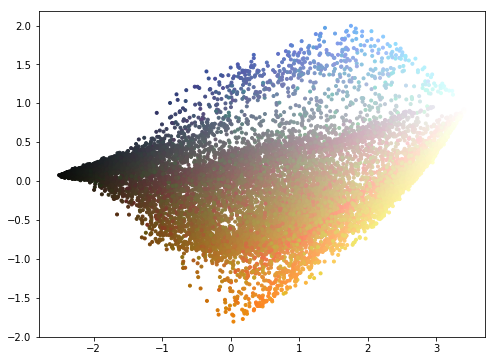

In [29]:
# Plot in 2D
plt.figure(figsize=(8,6))
#plt.scatter(-1*Z[:, 0], Z[:, 1], marker='.', c=idx, cmap='rainbow')
plt.scatter(-1*Z[:, 0], -1*Z[:, 1], marker='.', c=X)
plt.show()